In [25]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2023-05-23 15:21:44--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-05-23 15:21:44--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd85998e7809dc2fcdb92f1ae6.dl.dropboxusercontent.com/cd/0/inline/B8nPC4BwH6-c4HF804v0xI2JdL-IPXUYpxhwS1HxbfEcMnCN92vBVHVlc12O-iXfrIJYUGGXIu6UZaDCx9eIwyv_fmPd8jQ_SpLbzryriEMwDBU2iMCOaNi7StHfOq8WzS9zxoaD0XtvNv0cYHcktWqL9kx3c1W9r_uZTtLXNrs5Pg/file# [following]
--2023-05-23 15:21:45--  https://ucdd85998e7809dc2fcdb92f1ae6.dl.dropboxusercontent.com/cd/0/inline/B8nPC4BwH6-c4HF804v0xI2JdL-IPXUYpxhwS1HxbfEcMnCN92vBVHVlc12O-iXfrIJYUGGXIu6UZaDCx9eI

In [32]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img

#Building_Model

In [34]:
base_model =MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base_model.layers:
  layer.trainable=False
x=Flatten()(base_model.output)
x=Dense(units=7,activation='softmax')(x)
model=Model(base_model.input,x)

In [35]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Preparing_Data

In [37]:
from IPython.core.display import Image
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data=train_datagen.flow_from_directory(directory='/content/train',target_size=(224,224),batch_size=32)
train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [40]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= '/content/train', 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )
     

Found 350 images belonging to 7 classes.


#Visualizaing_Data


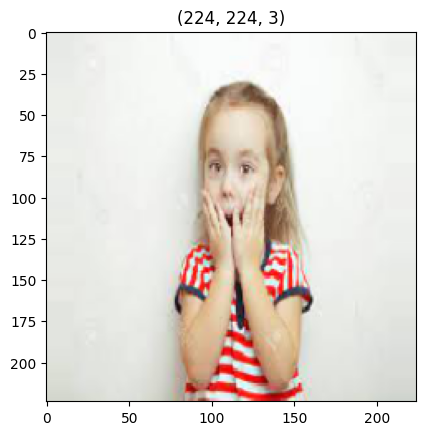

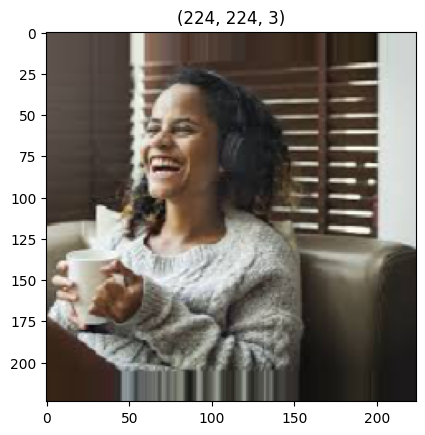

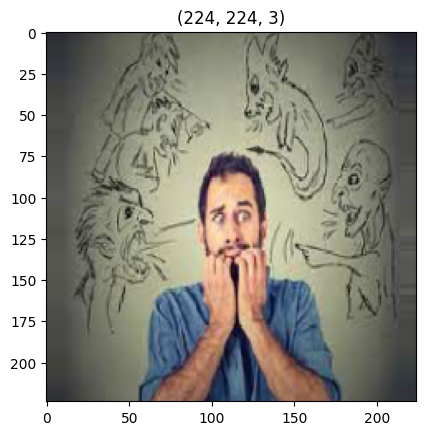

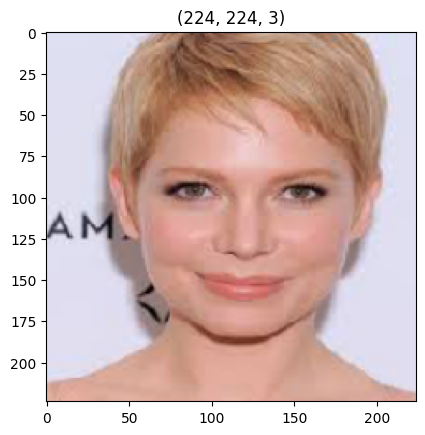

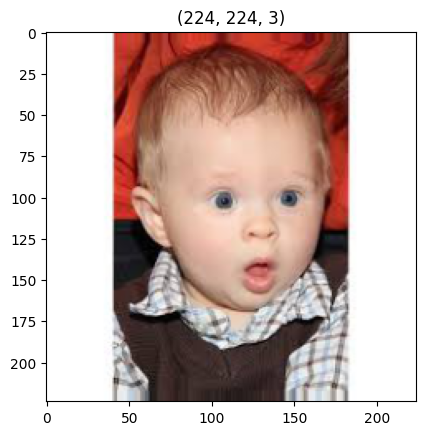

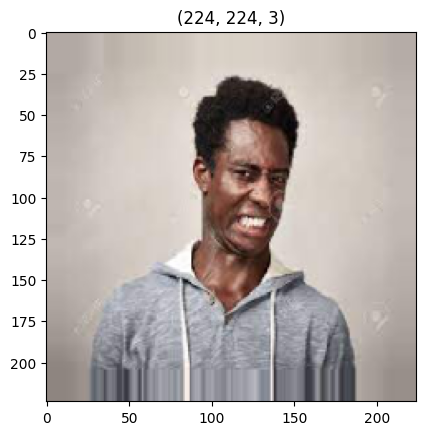

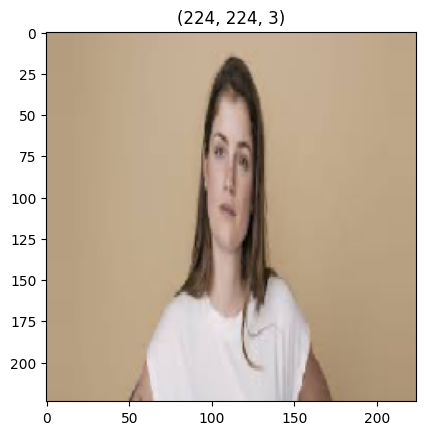

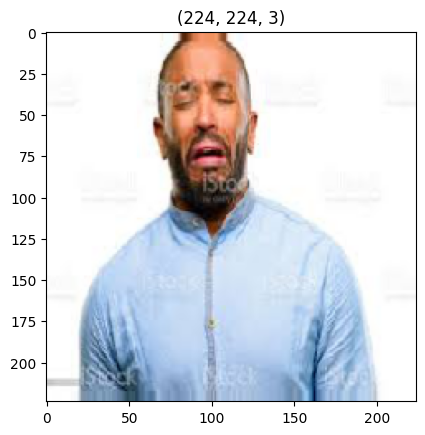

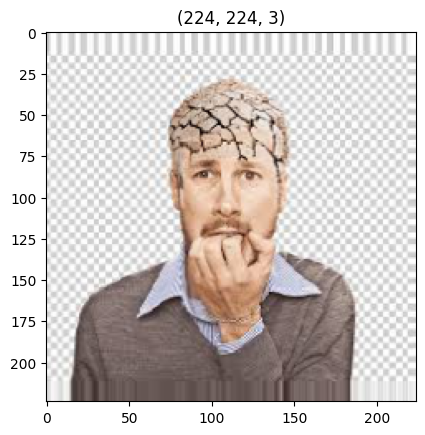

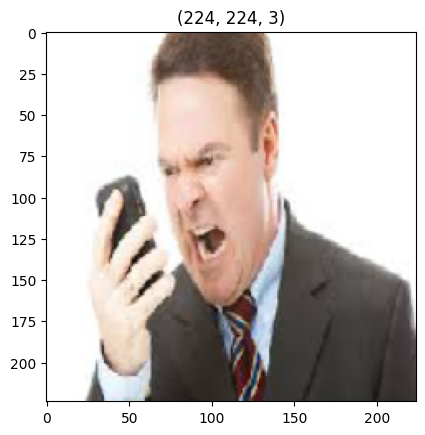

In [41]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

#having early stopping and model check point

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [43]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.5109 - accuracy: 0.1950
Epoch 1: val_accuracy improved from -inf to 0.51562, saving model to best_model.h5
10/10 [==============================] - 47s 4s/step - loss: 10.5109 - accuracy: 0.1950 - val_loss: 3.6521 - val_accuracy: 0.5156
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.3160 - accuracy: 0.5629
Epoch 2: val_accuracy improved from 0.51562 to 0.74609, saving model to best_model.h5
10/10 [==============================] - 43s 4s/step - loss: 3.3160 - accuracy: 0.5629 - val_loss: 1.5838 - val_accuracy: 0.7461
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.4491 - accuracy: 0.7642
Epoch 3: val_accuracy improved from 0.74609 to 0.82031, saving model to best_model.h5
10/10 [==============================] - 41s 4s/step - loss: 1.4491 - accuracy: 0.7642 - val_loss: 0.9528 - val_accuracy: 0.8203
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.9594

In [44]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [45]:
h =  hist.history
h.keys()
     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

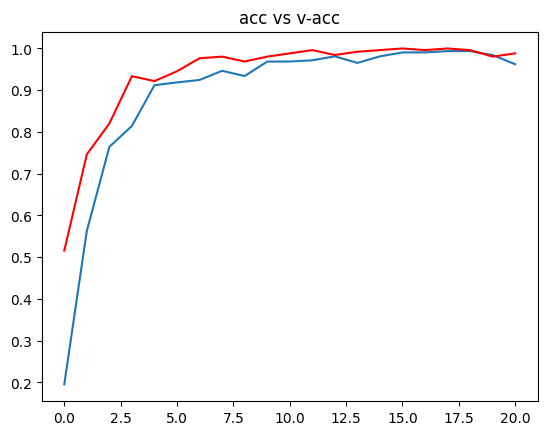

In [46]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

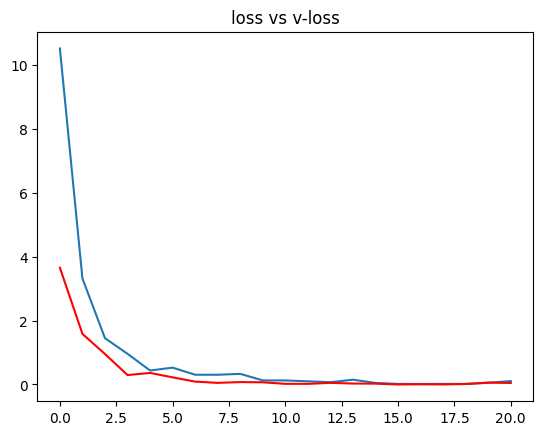

In [48]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()
     

In [49]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
     

1/1 [==============================] - 0s 216ms/step
 the image is of Surprise


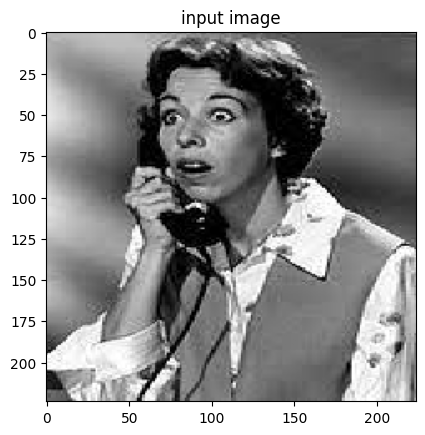

In [53]:
path = "/content/train/Surprise/download (10).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()